# **Question 1**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,077 (49.36 MB)

 Trainable params: 12,939,077 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.3071 - loss: 2.2632 - val_accuracy: 0.5163 - val_loss: 1.1923
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5377 - loss: 1.1129 - val_accuracy: 0.5899 - val_loss: 1.0370
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6170 - loss: 0.9775 - val_accuracy: 0.5858 - val_loss: 1.0388
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7063 - loss: 0.7910 - val_accuracy: 0.5804 - val_loss: 1.0005
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7944 - loss: 0.5590 - val_accuracy: 0.6131 - val_loss: 1.1810
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8764 - loss: 0.3548 - val_accuracy: 0.6035 - val_loss: 1.3572
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9472 - loss: 0.1779 - val_accuracy: 0.5872 - val_loss: 1.8155
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9636 - loss: 0.1435 - val_accuracy: 0.6035 - 

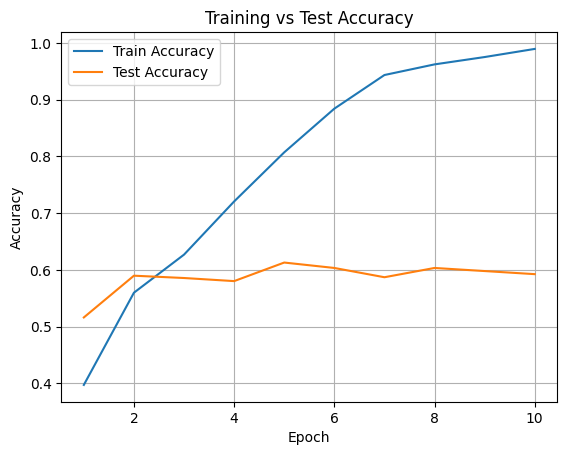

Classification Report:
              precision    recall  f1-score   support

   dandelion       0.67      0.69      0.68       159
       daisy       0.48      0.59      0.53       120
      tulips       0.55      0.62      0.59       186
  sunflowers       0.76      0.73      0.75       138
       roses       0.47      0.28      0.35       131

    accuracy                           0.59       734
   macro avg       0.59      0.58      0.58       734
weighted avg       0.59      0.59      0.59       734

Confusion Matrix:
[[110  24  10   9   6]
 [ 16  71  16   7  10]
 [ 18  17 116  12  23]
 [ 13  10  11 101   3]
 [  8  25  57   4  37]]


In [3]:
!pip install -q tensorflow tensorflow-datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

size = 128

def prep(image, label):
    img = tf.cast(image, tf.float32) / 255.0
    img = tf.image.resize(img, [size, size])
    return img, label

batch = 32
train_ds = ds_train.map(prep).shuffle(500).batch(batch).prefetch(tf.data.AUTOTUNE)
test_ds  = ds_test.map(prep).batch(batch).prefetch(tf.data.AUTOTUNE)

num_classes = ds_info.features['label'].num_classes

model = keras.Sequential([
    layers.InputLayer(input_shape=(size, size, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

epochs = 10
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds
)

%matplotlib inline
train_acc = history.history['accuracy']
test_acc  = history.history['val_accuracy']
epochs_x  = range(1, epochs + 1)

plt.plot(epochs_x, train_acc, label='Train Accuracy')
plt.plot(epochs_x, test_acc,  label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Test Accuracy')
plt.grid(True)
plt.show()

all_true = []
all_pred = []

for batch_images, batch_labels in test_ds:
    batch_probs = model.predict(batch_images, verbose=0)
    batch_preds = np.argmax(batch_probs, axis=1)
    all_true.extend(batch_labels.numpy())
    all_pred.extend(batch_preds)

class_names = ds_info.features['label'].names

print("Classification Report:")
print(classification_report(all_true, all_pred, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(all_true, all_pred))

# **Question 2**

Saving A5.csv to A5 (1).csv
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 - 2s - 56ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 2/20
44/44 - 1s - 18ms/step - loss: 3.3244e-04 - val_loss: 0.0011
Epoch 3/20
44/44 - 1s - 12ms/step - loss: 2.6596e-04 - val_loss: 8.1945e-04
Epoch 4/20
44/44 - 1s - 16ms/step - loss: 2.6133e-04 - val_loss: 0.0012
Epoch 5/20
44/44 - 1s - 25ms/step - loss: 2.3883e-04 - val_loss: 8.9778e-04
Epoch 6/20
44/44 - 1s - 13ms/step - loss: 2.1759e-04 - val_loss: 6.6717e-04
Epoch 7/20
44/44 - 1s - 14ms/step - loss: 2.2296e-04 - val_loss: 6.6471e-04
Epoch 8/20
44/44 - 0s - 9ms/step - loss: 2.0140e-04 - val_loss: 0.0011
Epoch 9/20
44/44 - 0s - 10ms/step - loss: 1.9582e-04 - val_loss: 6.8878e-04
Epoch 10/20
44/44 - 1s - 14ms/step - loss: 2.2222e-04 - val_loss: 8.0419e-04
Epoch 11/20
44/44 - 0s - 9ms/step - loss: 2.4941e-04 - val_loss: 0.0019
Epoch 12/20
44/44 - 0s - 10ms/step - loss: 1.8359e-04 - val_loss: 5.4529e-04
Epoch 13/20
44/44 - 0s - 9ms/step - loss: 1.7379e-04 - val_loss: 6.5725e-04
Epoch 14/20
44/44 - 0s - 9ms/step - loss: 1.68

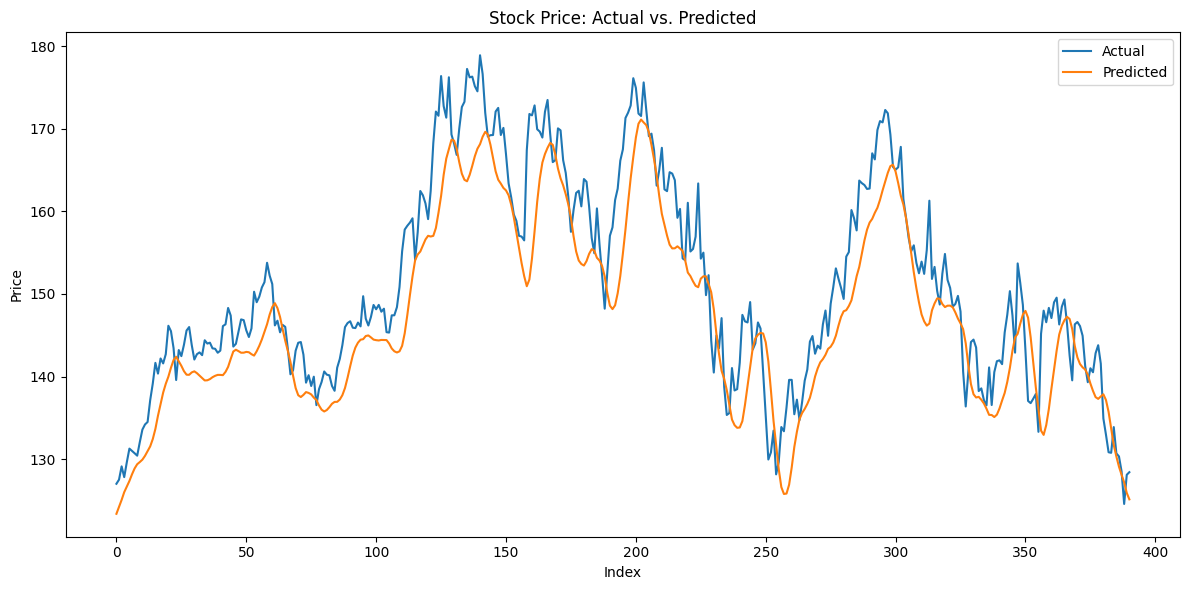

In [4]:
!pip install -q tensorflow scikit-learn pandas matplotlib

from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('A5.csv')
prices = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler((0, 1))
prices_scaled = scaler.fit_transform(prices)

seq_len = 60
X, y = [], []
for i in range(seq_len, len(prices_scaled)):
    X.append(prices_scaled[i-seq_len:i, 0])
    y.append(prices_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    dates = df['Date'].iloc[-len(actual):]
    plt.plot(dates, actual, label='Actual')
    plt.plot(dates, pred,   label='Predicted')
else:
    plt.plot(actual, label='Actual')
    plt.plot(pred,   label='Predicted')

plt.title('Stock Price: Actual vs. Predicted')
plt.xlabel('Date' if 'Date' in df.columns else 'Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()